# TP Final
## Alumnos: F. Boccazzi, H. De Lorenzo, G. Luna

Queremos responder

¿que indicadores de salud nos dicen si alguien es mas propenso a tener problemas de sueño?


### Importamos datos e iniciamos el EDA

fuente: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
archivo =  'https://raw.githubusercontent.com/fede19bocc/Posibles_dataset_IAA/main/Sleep_health_and_lifestyle_dataset.csv'
df_sueno = pd.read_csv(archivo)

In [4]:
df_sueno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


No hay datos Null pero tenemos 5 features categoricos:
Gender: ['Male', 'Female'],

Occupation: ['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager']

BMI: ['Overweight', 'Normal', 'Obese', 'Normal Weight']

Blood Pressure: sistolica/diastolica. Vamos a separarla en presion alta y presion baja (ej: '120/85' a 120 y 85)

Sleep Disorder: ['None', 'Sleep Apnea', 'Insomnia']


Empezamos explorando cada uno y viendo si podemos achicar la cantidad de categorias en cada feature.

In [5]:
df_sueno.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [6]:
df_sueno.groupby(['Gender','Occupation']).size().reset_index(name='counts')


,Gender,Occupation,counts
0,Female,Accountant,36
1,Female,Doctor,2
2,Female,Engineer,32
3,Female,Lawyer,2
4,Female,Manager,1
5,Female,Nurse,73
6,Female,Scientist,4
7,Female,Teacher,35
8,Male,Accountant,1
9,Male,Doctor,69


No hay una distribución homogenea para genero y ocupación

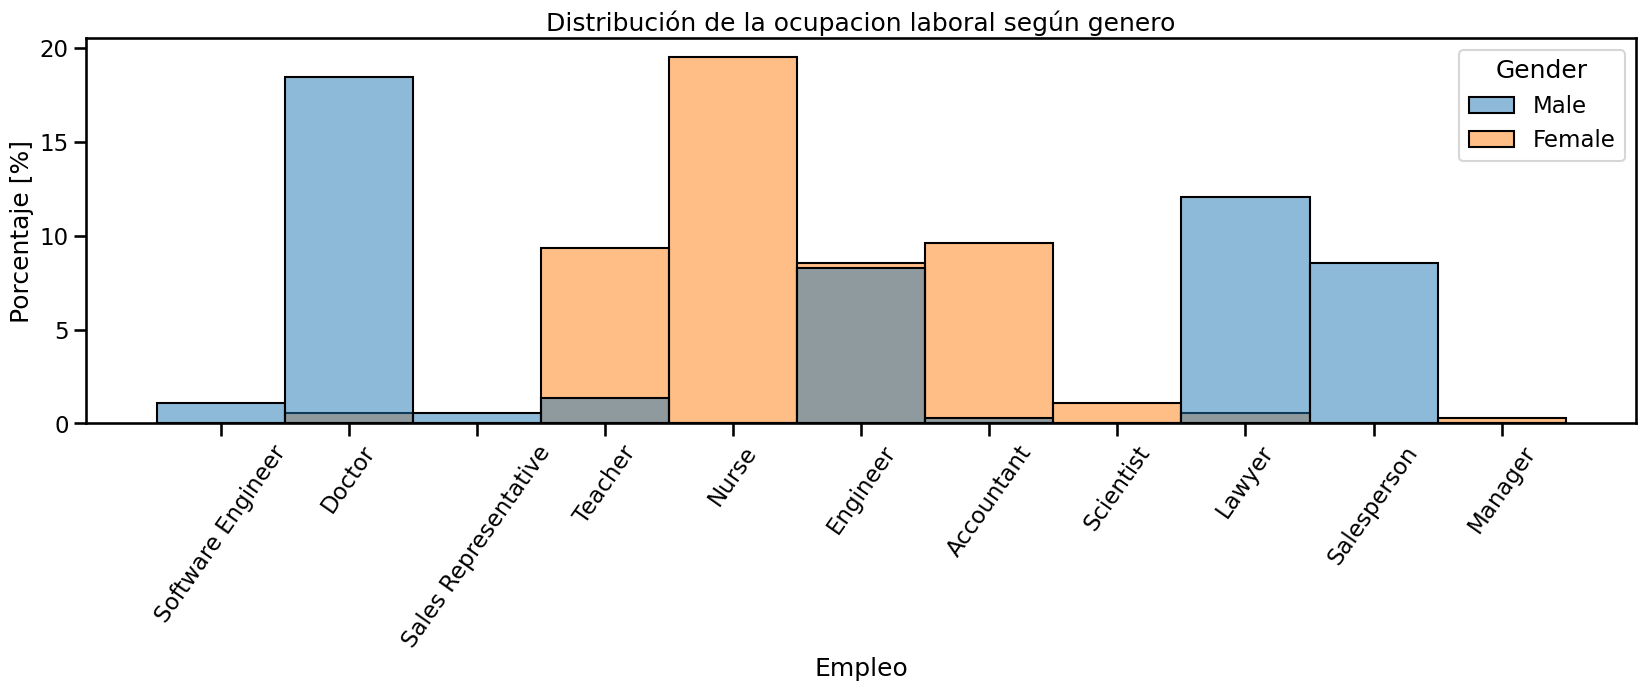

In [7]:
sns.set_context('talk')
plt.figure(figsize=(20,5))
t = sns.histplot(df_sueno, x='Occupation', hue='Gender', stat='percent')
t.set(title='Distribución de la ocupacion laboral según genero',
      xlabel='Empleo', ylabel='Porcentaje [%]', )
t.tick_params(axis='x', rotation=55)

[Text(0.5, 1.0, 'Distribución de desorden de sueño'),
 Text(0.5, 0, 'Desorden'),
 Text(0, 0.5, 'Porcentaje [%]')]

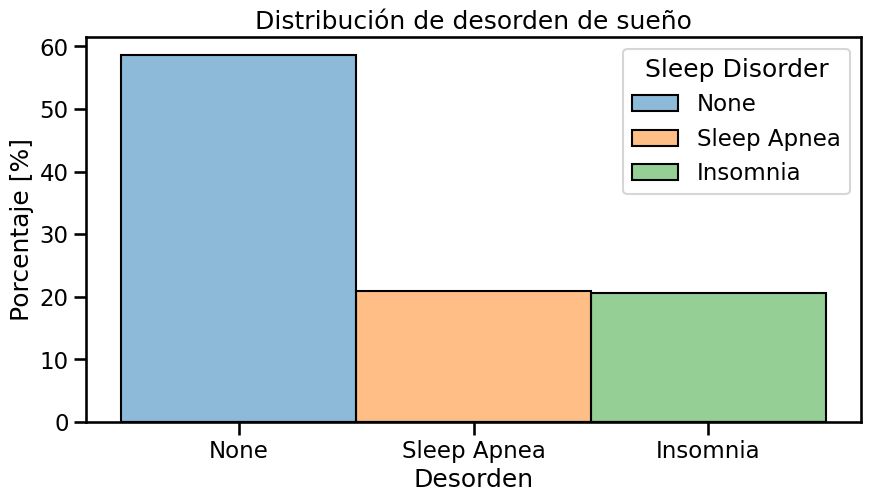

In [8]:
sns.set_context('talk')
plt.figure(figsize=(10,5))
t = sns.histplot(df_sueno, x='Sleep Disorder', hue='Sleep Disorder', stat='percent')
t.set(title='Distribución de desorden de sueño',
      xlabel='Desorden', ylabel='Porcentaje [%]')

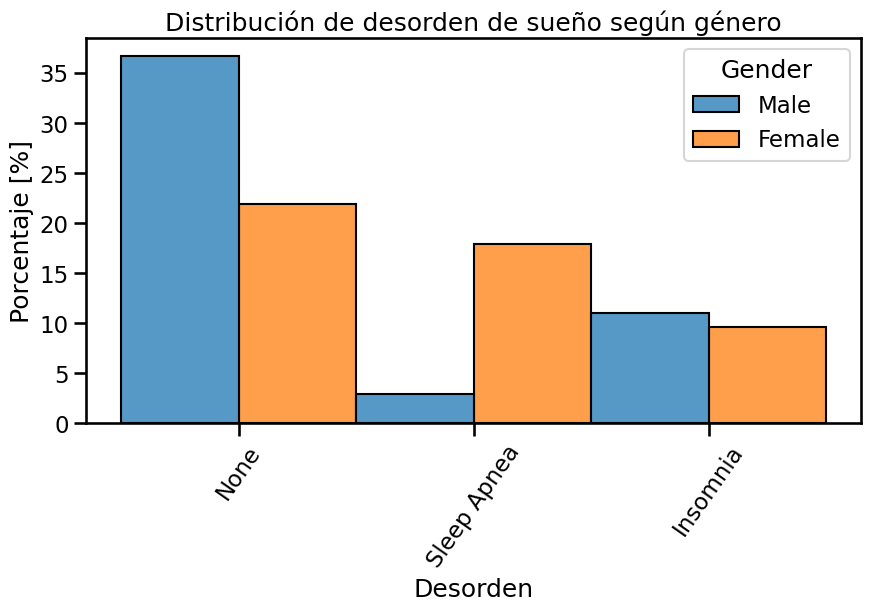

In [9]:
sns.set_context('talk')
plt.figure(figsize=(10,5))
t = sns.histplot(df_sueno, x='Sleep Disorder', hue='Gender', stat='percent', multiple='dodge')
t.set(title='Distribución de desorden de sueño según género',
      xlabel='Desorden', ylabel='Porcentaje [%]', )
t.tick_params(axis='x', rotation=55)

In [10]:
df_sueno.groupby(['Gender','Blood Pressure']).size().reset_index(name='counts')

,Gender,Blood Pressure,counts
0,Female,115/75,32
1,Female,115/78,2
2,Female,117/76,1
3,Female,118/75,2
4,Female,119/77,2
5,Female,120/80,1
6,Female,125/80,32
7,Female,125/82,2
8,Female,126/83,1
9,Female,128/85,3


In [11]:
df_sueno.groupby(['Gender','Sleep Disorder']).size().reset_index(name='counts')

,Gender,Sleep Disorder,counts
0,Female,Insomnia,36
1,Female,None,82
2,Female,Sleep Apnea,67
3,Male,Insomnia,41
4,Male,None,137
5,Male,Sleep Apnea,11


La mayor cantidad de apnea de sueño son enfermeras

Hacemos un paneo rapido de las correlaciones con pairplot

In [12]:
columns = df_sueno.columns
list(columns)

['Person ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Physical Activity Level',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate',
 'Daily Steps',
 'Sleep Disorder']

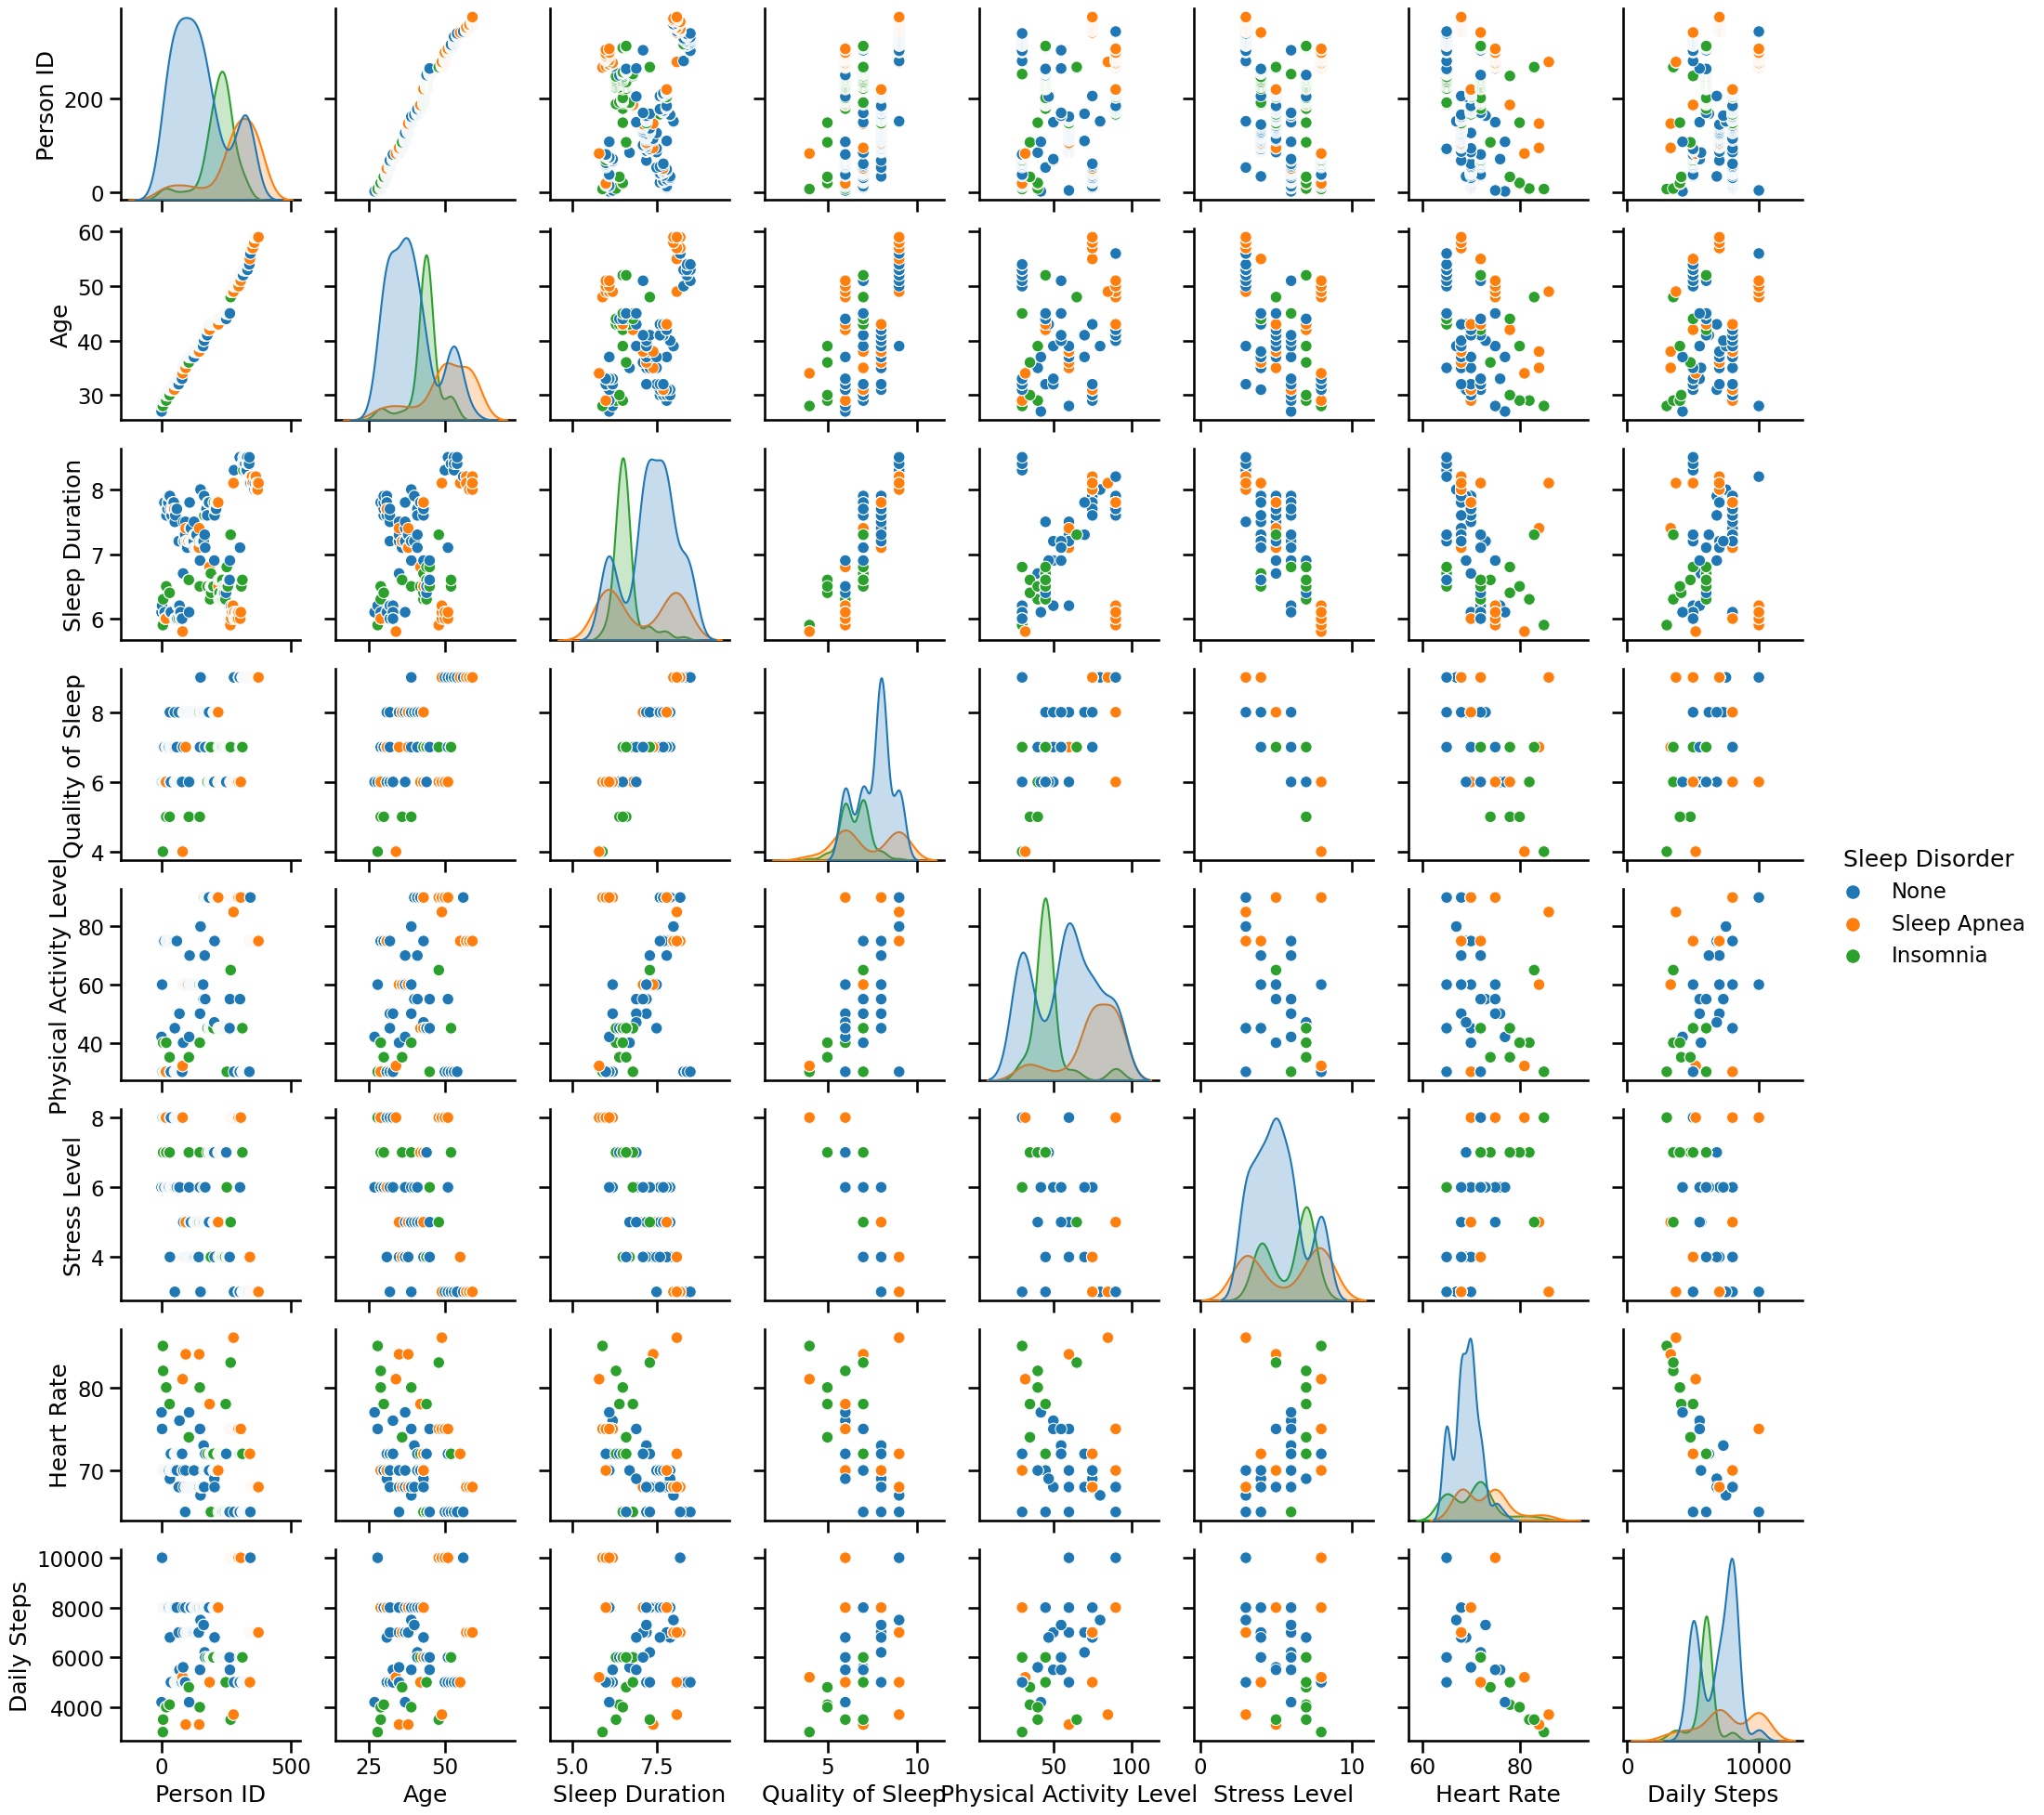

In [13]:
sns.pairplot(df_sueno, hue='Sleep Disorder')

hay una correlacion entre el ritmo cardiaco y los pasos diarios y tambien observamos que esta influenciada por el BMI

[Text(0.5, 1.0, 'Ritmo cardiaco vs pasos diarios'),
 Text(0.5, 0, 'Pasos diarios'),
 Text(0, 0.5, 'Ritmo cardiaco [lat/min]')]

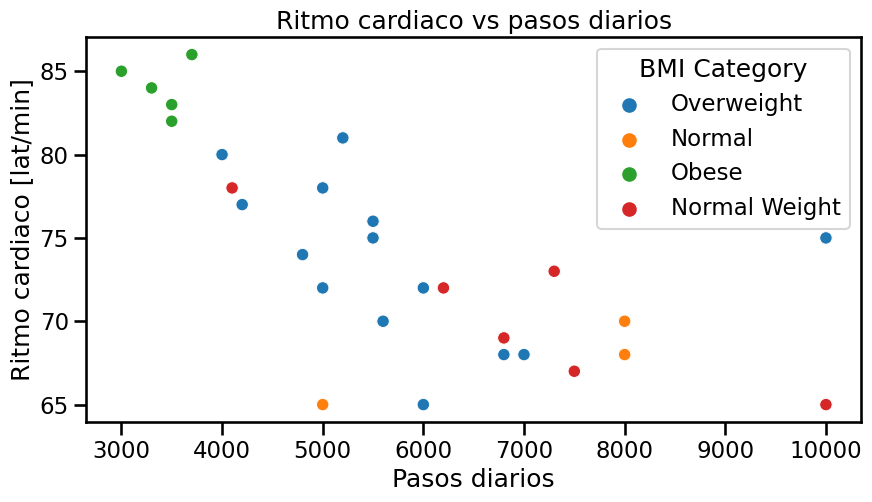

In [14]:
sns.set_context('talk')
plt.figure(figsize=(10,5))
g = sns.scatterplot(df_sueno, x='Daily Steps', y='Heart Rate', hue='BMI Category')
g.set(title='Ritmo cardiaco vs pasos diarios',
      xlabel='Pasos diarios', ylabel='Ritmo cardiaco [lat/min]')

[Text(0.5, 1.0, 'Distribución por edad'),
 (0.0, 20.0),
 Text(0.5, 0, 'Edad [años]'),
 Text(0, 0.5, 'Porcentaje [%]')]

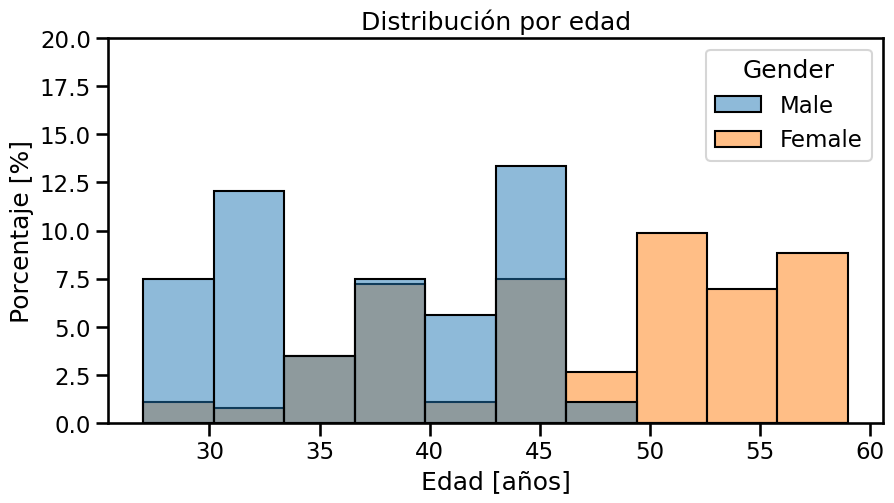

In [15]:
sns.set_context('talk')
plt.figure(figsize=(10,5))
g = sns.histplot(df_sueno, x='Age', hue='Gender', stat='percent')
g.set(title='Distribución por edad', ylim=(0, 20),
      xlabel='Edad [años]', ylabel='Porcentaje [%]')


<Axes: xlabel='Sleep Duration', ylabel='BMI Category'>

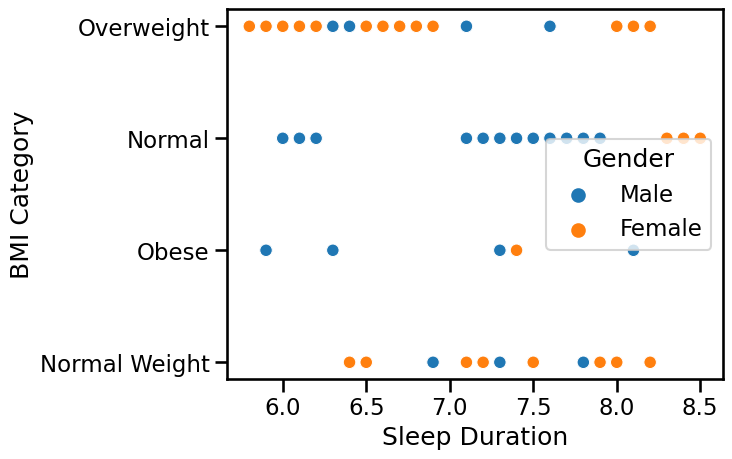

In [16]:
sns.scatterplot(df_sueno, y='BMI Category', x='Sleep Duration', hue='Gender')

En un proximo paso juntamos normal weight con normal

In [17]:
df_sueno['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

la escala de strees es subjetiva, ya que define el nivel cada individuo, pero nos da una idea de cuales actividades son mas o menos estresantes

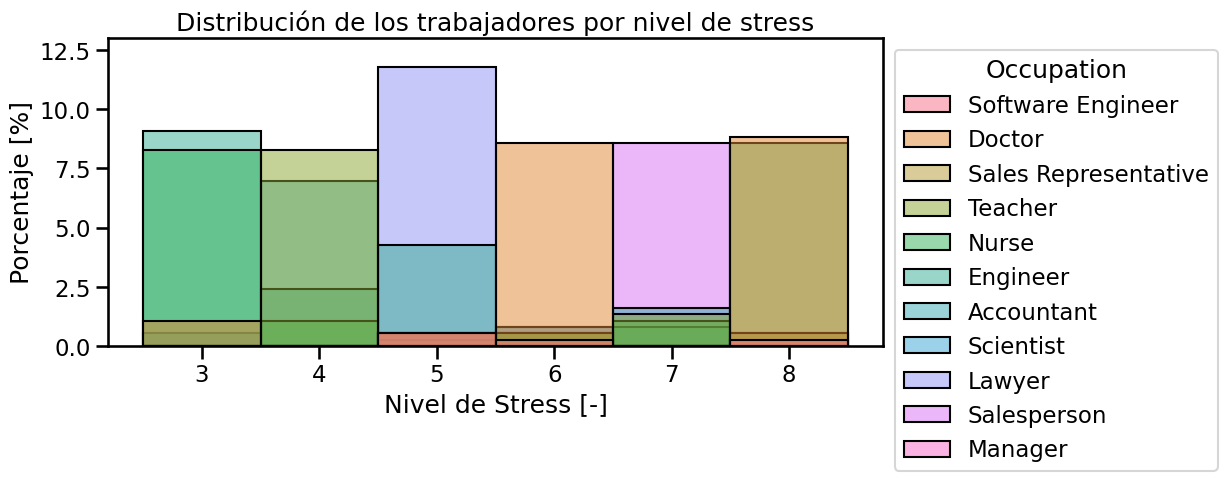

In [18]:
plt.figure(figsize=(10,4))
sns.set_context('talk')
g = sns.histplot(df_sueno, x='Stress Level', hue='Occupation', bins=6, discrete=True, stat='percent')
g.set(title='Distribución de los trabajadores por nivel de stress', ylim=(0, 13),
      xlabel='Nivel de Stress [-]', ylabel='Porcentaje [%]')
sns.move_legend(g, "best", bbox_to_anchor=(1, 1))

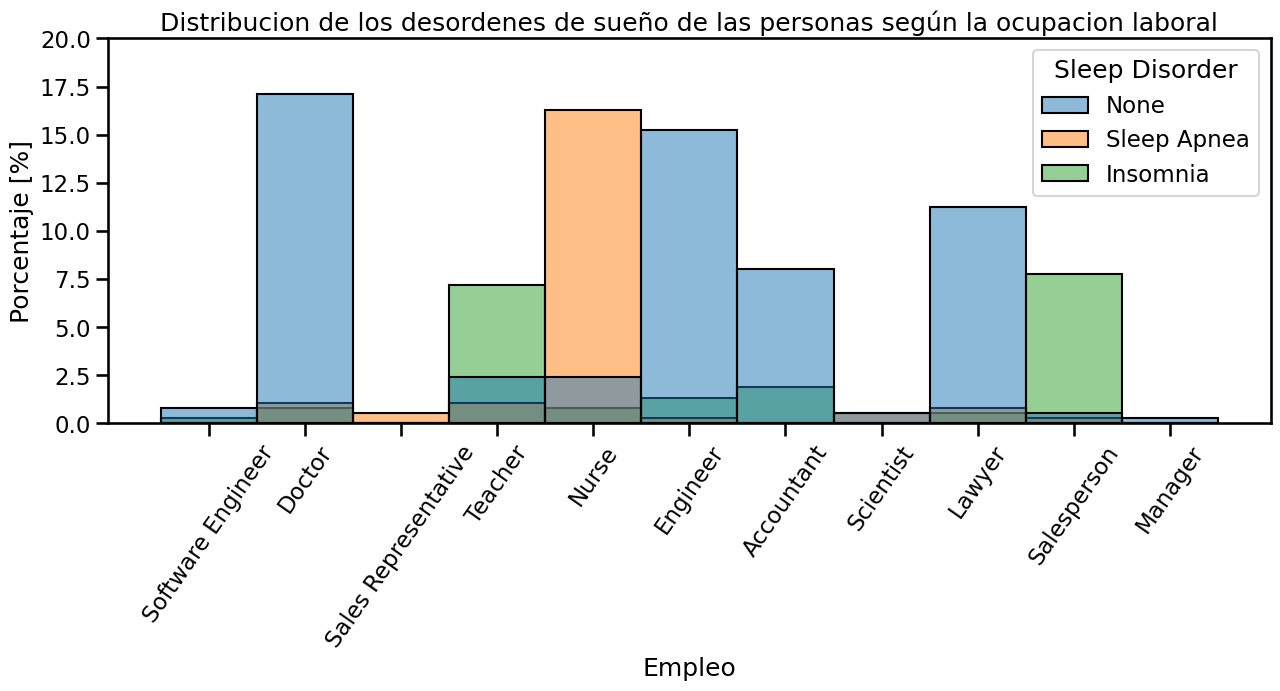

In [19]:
plt.figure(figsize=(15,5))
sns.set_context('talk')
g = sns.histplot(df_sueno, x='Occupation', hue='Sleep Disorder', stat='percent')
g.set(title='Distribucion de los desordenes de sueño de las personas según la ocupacion laboral',
      xlabel='Empleo', ylabel='Porcentaje [%]', ylim=(0, 20))
g.tick_params(axis='x', rotation=55)

# Modificamos el df original

In [20]:
sueno = df_sueno.copy()

In [21]:
columnas = {'Person ID': 'ID',
 'Sleep Duration': 'Sleep_Duration',
 'Quality of Sleep': 'Quality',
 'Physical Activity Level': 'Physical_Activity_Level',
 'Stress Level': 'Stress',
 'BMI Category': 'BMI_category',
 'Blood Pressure': 'Blood_pressure',
 'Heart Rate': 'Heart_rate',
 'Daily Steps': 'Daily_steps',
 'Sleep Disorder': 'Sleep_disorder'}

sueno.rename(columns = columnas, inplace=True)

In [22]:
bmi = list(sueno['BMI_category'].unique())
ocupacion = list(sueno['Occupation'].unique())


convertimos en un principio la columna occupation en un booleano si es o no trabajador de salud y en un momento evaluamos preguntarnos como afectaba el desorden del sueño a estos trabajadores, despues descartamos esta linea para enfocarnos en una pregunta que se pueda usar a un publico general

In [23]:
ocu_dict = {
    'Software Engineer': False,
    'Doctor': True,
    'Sales Representative': False,
    'Teacher': False,
    'Nurse': True,
    'Engineer': False,
    'Accountant': False,
    'Scientist': False,
    'Lawyer': False,
    'Salesperson': False,
    'Manager': False
}
a = sueno['Occupation']
sueno['Trabajador_salud'] = a
sueno['Trabajador_salud'].replace(ocu_dict,  inplace=True)

bmi los convertimos en 3 valores.

0 Normal

1 Sobrepeso

2 Obesidad

In [24]:
bmi_dict = {
    'Overweight': 1,
    'Normal': 0,
    'Normal Weight': 0,
    'Obese': 2
}
_ = sueno['BMI_category']
sueno['BMI'] = _
sueno['BMI'].replace(bmi_dict,  inplace=True)

In [25]:
sueno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Quality                  374 non-null    int64  
 6   Physical_Activity_Level  374 non-null    int64  
 7   Stress                   374 non-null    int64  
 8   BMI_category             374 non-null    object 
 9   Blood_pressure           374 non-null    object 
 10  Heart_rate               374 non-null    int64  
 11  Daily_steps              374 non-null    int64  
 12  Sleep_disorder           374 non-null    object 
 13  Trabajador_salud         374 non-null    bool   
 14  BMI                      3

Con desorden de sueno le dimos valores a las tres opciones 0: None, 1: Apnea y 2: Insomnio

In [26]:
disorder_dict = {
    'None': 0,
    'Sleep Apnea': 1,
    'Insomnia': 2
}
_ = sueno['Sleep_disorder']
sueno['Desorden'] = _
sueno['Desorden'].replace(disorder_dict,  inplace=True)

convertimos en booleano genero, siendo true si es mujer

In [27]:
sueno['Women'] = sueno['Gender'] == 'Female'

In [28]:
sueno.replace('Normal Weight', 'Normal', inplace=True)

separamos presion sanguinea en presion sistolica y diastolica y luego sistolica la usamos para generar un booleano si tienen o no peligro de hipertension a partir de 130.

Ref: https://medlineplus.gov/spanish/ency/article/000468.htm#:~:text=Hipertensi%C3%B3n%20es%20el%20t%C3%A9rmino%20m%C3%A9dico,y%20otros%20problemas%20de%20salud.

In [29]:
sueno[['High_BP','Low_BP']]=sueno.Blood_pressure.str.split('/',expand=True)

sueno['High_BP'] = sueno['High_BP'].astype('int64')
sueno['Low_BP'] = sueno['Low_BP'].astype('int64')

In [30]:
sueno.groupby(['High_BP']).size().reset_index(name='counts')

,High_BP,counts
0,115,34
1,117,2
2,118,3
3,119,2
4,120,45
5,121,1
6,122,1
7,125,69
8,126,2
9,128,5


In [31]:
sueno['High_Pressure'] = sueno['High_BP'] >= 130

In [32]:
sueno.head()

,ID,Gender,Age,Occupation,Sleep_Duration,Quality,Physical_Activity_Level,Stress,BMI_category,Blood_pressure,Heart_rate,Daily_steps,Sleep_disorder,Trabajador_salud,BMI,Desorden,Women,High_BP,Low_BP,High_Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,False,1,0,False,126,83,False
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,True,0,0,False,125,80,False
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,True,0,0,False,125,80,False
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,False,2,1,False,140,90,True
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,False,2,1,False,140,90,True


Calidad de sueño es un valor subjetivo dado por cada individuo por este motivo no lo usamos para el modelo.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 65.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 36.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0.5, 1.0, 'Desorden de sueño según la calidad del sueño'),
 Text(0.5, 6.8833333333333275, 'Calidad de sueño'),
 Text(-86.79166666666667, 0.5, 'Desorden de sueño [-]')]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 51.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


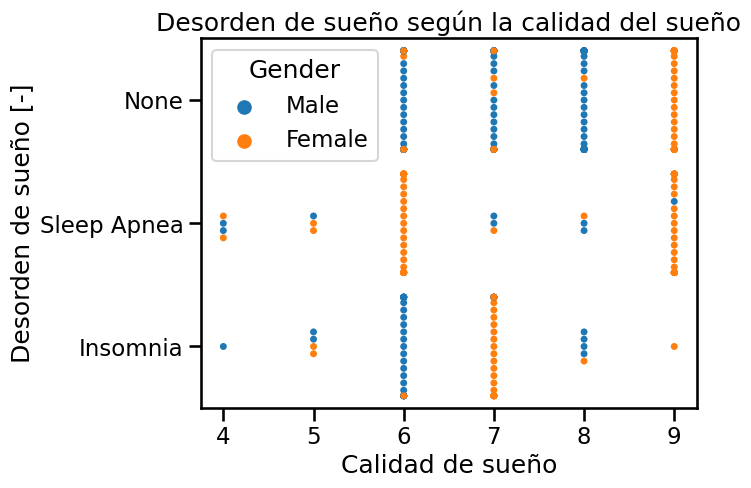

In [33]:
sns.set_context('talk')
g = sns.swarmplot(sueno, x='Quality', y='Sleep_disorder', hue='Gender')
g.set(title='Desorden de sueño según la calidad del sueño',
      xlabel='Calidad de sueño', ylabel='Desorden de sueño [-]', )

[Text(0.5, 1.0, 'Histograma desorden de sueño segun si tienen presion alta '),
 Text(0.5, 0, 'Desorden de sueño'),
 Text(0, 0.5, 'Cantidad [-]')]

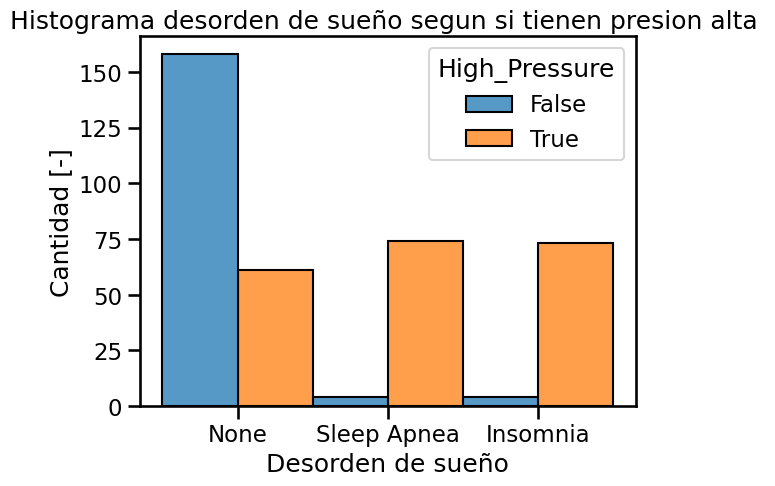

In [34]:
sns.set_context('talk')
g=sns.histplot(sueno, hue='High_Pressure', x='Sleep_disorder', multiple='dodge')
g.set(title='Histograma desorden de sueño segun si tienen presion alta ',
      xlabel='Desorden de sueño', ylabel='Cantidad [-]', )

hay una correlacion entre presion alta y desorden del sueño, puede ser un posible factor de salud a tener en cuenta

# DF acotado

Nos quedamos con solo columnas con int, float y bool para poder empezar a modelar.

In [35]:
sueno.columns

Index(['ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration', 'Quality',
       'Physical_Activity_Level', 'Stress', 'BMI_category', 'Blood_pressure',
       'Heart_rate', 'Daily_steps', 'Sleep_disorder', 'Trabajador_salud',
       'BMI', 'Desorden', 'Women', 'High_BP', 'Low_BP', 'High_Pressure'],
      dtype='object')

In [36]:
df_modelo = sueno.copy()
columnas_descartadas = ['ID','Gender', 'Occupation', 'BMI_category','Blood_pressure',
       'Sleep_disorder', 'High_BP', 'Low_BP', 'Trabajador_salud', 'Quality']
df_modelo.drop(columns = columnas_descartadas, inplace=True)
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep_Duration           374 non-null    float64
 2   Physical_Activity_Level  374 non-null    int64  
 3   Stress                   374 non-null    int64  
 4   Heart_rate               374 non-null    int64  
 5   Daily_steps              374 non-null    int64  
 6   BMI                      374 non-null    int64  
 7   Desorden                 374 non-null    int64  
 8   Women                    374 non-null    bool   
 9   High_Pressure            374 non-null    bool   
dtypes: bool(2), float64(1), int64(7)
memory usage: 24.2 KB


# Modelos e hiperparametros

In [37]:
df_modelo.head()

,Age,Sleep_Duration,Physical_Activity_Level,Stress,Heart_rate,Daily_steps,BMI,Desorden,Women,High_Pressure
0,27,6.1,42,6,77,4200,1,0,False,False
1,28,6.2,60,8,75,10000,0,0,False,False
2,28,6.2,60,8,75,10000,0,0,False,False
3,28,5.9,30,8,85,3000,2,1,False,True
4,28,5.9,30,8,85,3000,2,1,False,True


In [38]:
import seaborn as sns
import pandas as pdv
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn import tree as t1
from sklearn.model_selection import train_test_split

In [39]:


X = df_modelo.drop(columns='Desorden')
y = df_modelo['Desorden']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=74, random_state=19)

print(X_train.shape, X_test.shape, y_test.shape)


(300, 9) (74, 9) (74,)


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      374 non-null    int64  
 1   Sleep_Duration           374 non-null    float64
 2   Physical_Activity_Level  374 non-null    int64  
 3   Stress                   374 non-null    int64  
 4   Heart_rate               374 non-null    int64  
 5   Daily_steps              374 non-null    int64  
 6   BMI                      374 non-null    int64  
 7   Women                    374 non-null    bool   
 8   High_Pressure            374 non-null    bool   
dtypes: bool(2), float64(1), int64(6)
memory usage: 21.3 KB


## Arbol de decision

Empezamos modelando con un arbol de decisión y fuimos optimizando los hiperparametros usando como metrica el accuracy score.

In [41]:
# Grilla para Grid Search
max_depth_list = [3,4,5]
min_samples_split_list = [10,20,40,60,80]
min_samples_leaf_list = [10,20,30,40]
max_features_list = [3,4,5,6]

param_grid = {'max_depth': max_depth_list,
              'min_samples_split': min_samples_split_list,
              'min_samples_leaf': min_samples_leaf_list,
              'max_features': max_features_list}

In [42]:
np.random.seed(19)
df_results = pd.DataFrame()
N_folds = 80

model = DecisionTreeClassifier()
grid_model = GridSearchCV(model, param_grid, cv=N_folds)

grid_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 61 members, which is less than n_splits=80.
  warnings.warn(


GridSearchCV(cv=80, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5], 'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [10, 20, 30, 40],
                         'min_samples_split': [10, 20, 40, 60, 80]})

In [43]:
print("Mejores parametros: "+str(grid_model.best_params_))
print("Mejor Score: "+ str(grid_model.best_score_)+'\n')

scores = pd.DataFrame(grid_model.cv_results_)
# scores.head()

Mejores parametros: {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 10}
Mejor Score: 0.9083333333333332



cv = 80 Mejores parametros: {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 10, 'min_samples_split': 40}

Mejor Score: 0.905

CV = 80 Mejores parametros: {'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}

Mejor Score: 0.9018750000000001

cv = 80 Mejores parametros: {'max_depth': 9, 'max_features': 6, 'min_samples_leaf': 10, 'min_samples_split': 20}

Mejor Score: 0.9099999999999999

Mejores parametros: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 20}

Mejor Score: 0.898125

Mejores parametros: {'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 20, 'min_samples_split': 40}

Mejor Score: 0.9052083333333332

Modelo a utilizar

Mejores parametros: {'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}

Mejor Score: 0.9099999999999999

In [44]:
X_train.columns

Index(['Age', 'Sleep_Duration', 'Physical_Activity_Level', 'Stress',
       'Heart_rate', 'Daily_steps', 'BMI', 'Women', 'High_Pressure'],
      dtype='object')

[Text(0.47058823529411764, 0.9375, 'BMI <= 0.5\ngini = 0.568\nsamples = 300\nvalue = [177, 61, 62]\nclass = None'),
 Text(0.23529411764705882, 0.8125, 'Sleep_Duration <= 6.7\ngini = 0.122\nsamples = 172\nvalue = [161, 5, 6]\nclass = None'),
 Text(0.11764705882352941, 0.6875, 'Sleep_Duration <= 6.05\ngini = 0.339\nsamples = 25\nvalue = [20, 2, 3]\nclass = None'),
 Text(0.058823529411764705, 0.5625, 'gini = 0.142\nsamples = 13\nvalue = [12, 0, 1]\nclass = None'),
 Text(0.17647058823529413, 0.5625, 'gini = 0.5\nsamples = 12\nvalue = [8, 2, 2]\nclass = None'),
 Text(0.35294117647058826, 0.6875, 'Sleep_Duration <= 7.85\ngini = 0.079\nsamples = 147\nvalue = [141, 3, 3]\nclass = None'),
 Text(0.29411764705882354, 0.5625, 'Age <= 42.5\ngini = 0.104\nsamples = 111\nvalue = [105, 3, 3]\nclass = None'),
 Text(0.23529411764705882, 0.4375, 'Sleep_Duration <= 7.25\ngini = 0.08\nsamples = 97\nvalue = [93, 2, 2]\nclass = None'),
 Text(0.11764705882352941, 0.3125, 'Sleep_Duration <= 7.15\ngini = 0.132\

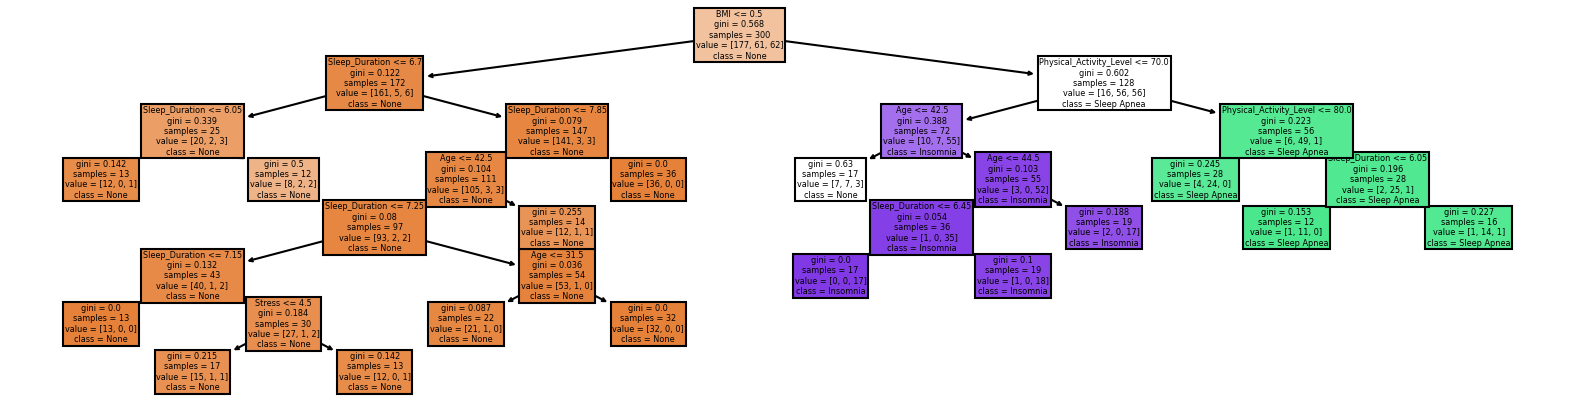

In [45]:
tree = DecisionTreeClassifier(max_depth=9, max_features=5, min_samples_leaf=10, min_samples_split=20)
tree.fit(X_train, y_train)


plt.figure(figsize=(20,5))
t1.plot_tree(tree, class_names=['None', 'Sleep Apnea', 'Insomnia'],
             feature_names=['Age', 'Sleep_Duration', 'Physical_Activity_Level',
                            'Stress', 'Heart_rate', 'Daily_steps', 'BMI', 'Women', 'High_Pressure'], filled=True)

Esto lleva a un arbol con demasiados nodos para simplemente clasificarlos en 3 categorias. Por este motivo limitamos la profundidad a 3

[Text(0.4583333333333333, 0.875, 'High_Pressure <= 0.5\ngini = 0.568\nsamples = 300\nvalue = [177, 61, 62]\nclass = None'),
 Text(0.25, 0.625, 'Age <= 36.5\ngini = 0.074\nsamples = 132\nvalue = [127, 2, 3]\nclass = None'),
 Text(0.16666666666666666, 0.375, 'Age <= 32.5\ngini = 0.133\nsamples = 71\nvalue = [66, 2, 3]\nclass = None'),
 Text(0.08333333333333333, 0.125, 'gini = 0.043\nsamples = 45\nvalue = [44, 1, 0]\nclass = None'),
 Text(0.25, 0.125, 'gini = 0.269\nsamples = 26\nvalue = [22, 1, 3]\nclass = None'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 61\nvalue = [61, 0, 0]\nclass = None'),
 Text(0.6666666666666666, 0.625, 'Physical_Activity_Level <= 52.5\ngini = 0.665\nsamples = 168\nvalue = [50, 59, 59]\nclass = Sleep Apnea'),
 Text(0.5, 0.375, 'Heart_rate <= 75.0\ngini = 0.252\nsamples = 63\nvalue = [2, 7, 54]\nclass = Insomnia'),
 Text(0.4166666666666667, 0.125, 'gini = 0.075\nsamples = 51\nvalue = [2, 0, 49]\nclass = Insomnia'),
 Text(0.5833333333333334, 0.125, 'gi

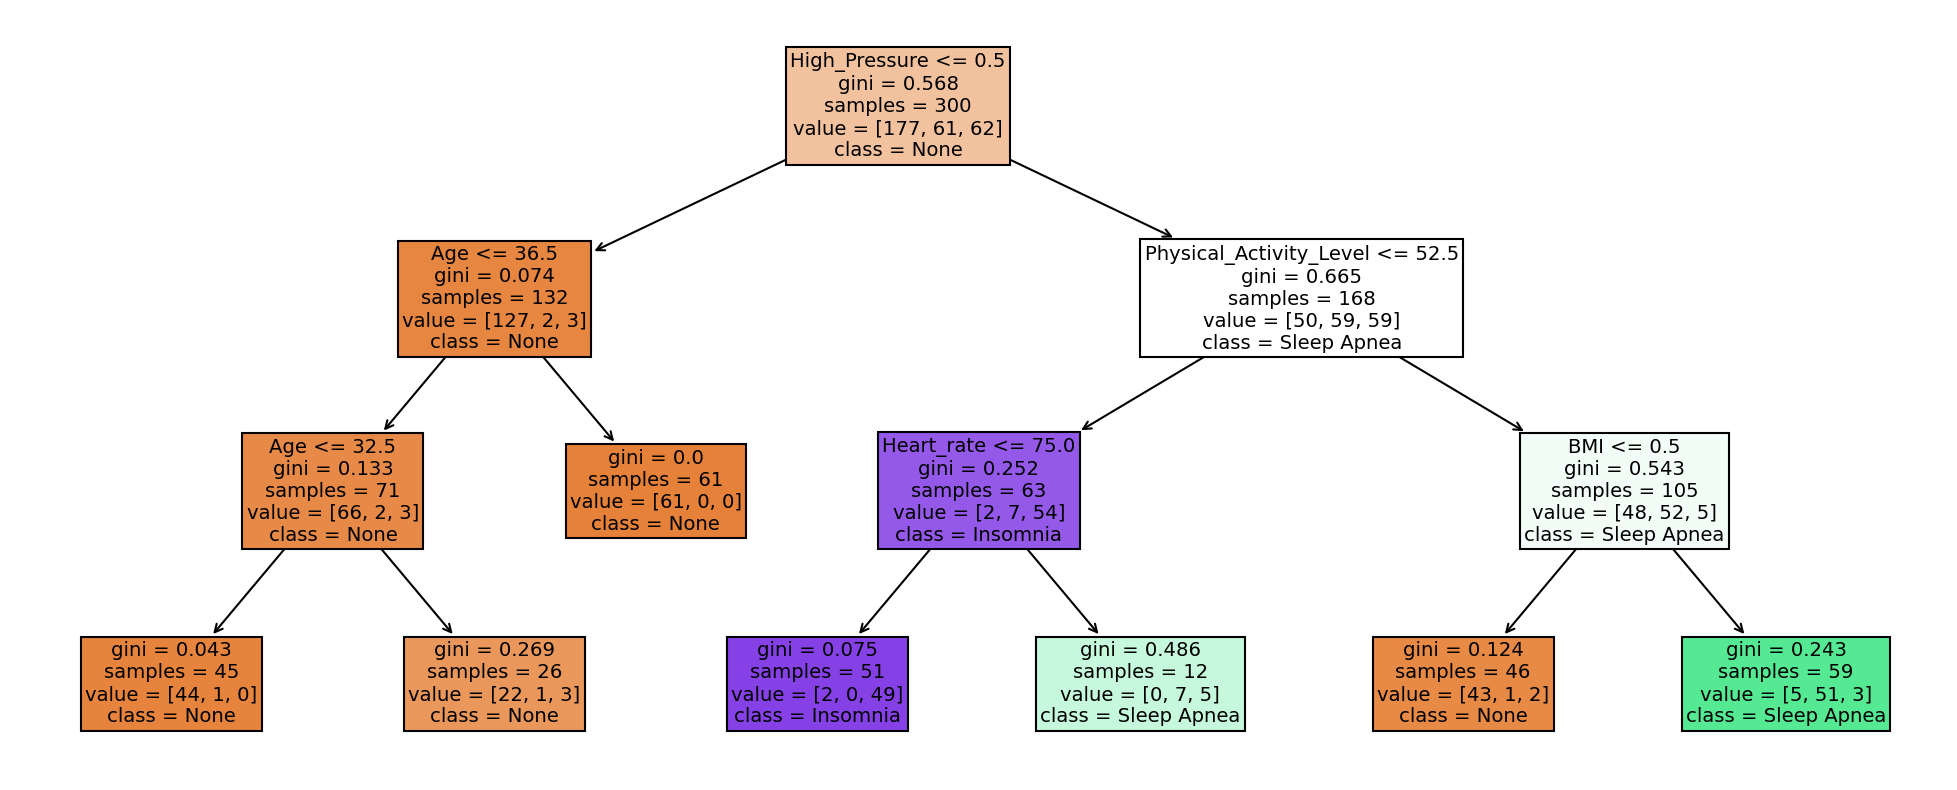

In [103]:
tree = DecisionTreeClassifier(max_depth=3,max_features=5,min_samples_leaf=10, min_samples_split=20)
tree.fit(X_train, y_train)

plt.figure(figsize=(25,10))
t1.plot_tree(tree, class_names=['None', 'Sleep Apnea', 'Insomnia'],
             feature_names=['Age', 'Sleep_Duration', 'Physical_Activity_Level',
                            'Stress', 'Heart_rate', 'Daily_steps', 'BMI', 'Women', 'High_Pressure'], filled=True)


In [114]:
tree.feature_importances_

array([0.0057452 , 0.        , 0.29417471, 0.        , 0.04705522,
       0.        , 0.28121321, 0.        , 0.37181166])

In [115]:
y_pred_tree = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_tree)
print(f'El modelo tiene un accuracy de {accuracy}')

El modelo tiene un accuracy de 0.8648648648648649


In [106]:
matriz_confucion_tree =  confusion_matrix(y_test, y_pred_tree)
print(matriz_confucion_tree)

[[40  0  2]
 [ 3 13  1]
 [ 3  1 11]]


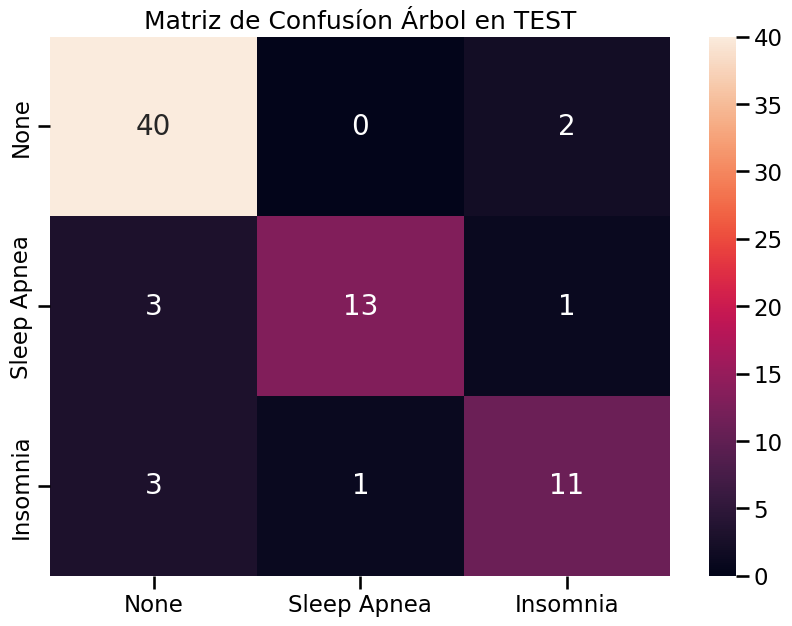

In [108]:
#sns.set_context('talk')
mat_con_tree = pd.DataFrame(matriz_confucion_tree, index=["None", "Sleep Apnea", "Insomnia"],
                       columns=["None", "Sleep Apnea", "Insomnia"])
plt.figure(figsize = (10,7))
sns.heatmap(mat_con_tree, annot=True, annot_kws={'size': 20})
plt.title("Matriz de Confusíon Árbol en TEST")
plt.show()

In [109]:
reporte_tree = classification_report(y_test, y_pred_tree)
print(reporte_tree)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.93      0.76      0.84        17
           2       0.79      0.73      0.76        15

    accuracy                           0.86        74
   macro avg       0.86      0.82      0.84        74
weighted avg       0.87      0.86      0.86        74



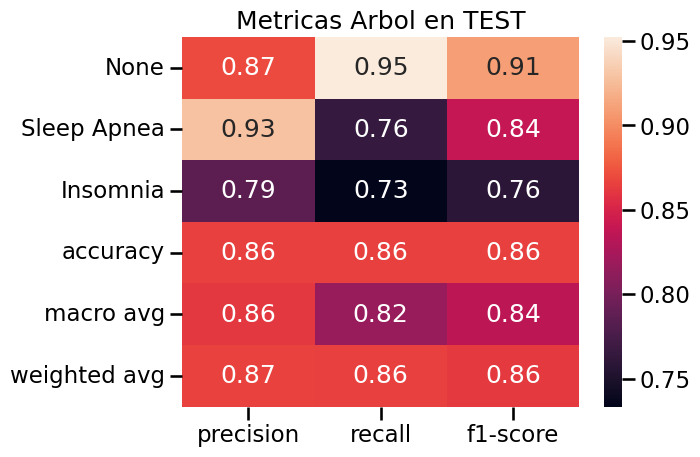

In [110]:
target_names = ['None', 'Sleep Apnea', 'Insomnia']
reporte_tree = classification_report(y_test,
                                   y_pred_tree,
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(reporte_tree).iloc[:-1, :].T, annot=True)
plt.title("Metricas Arbol en TEST")
plt.show()

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

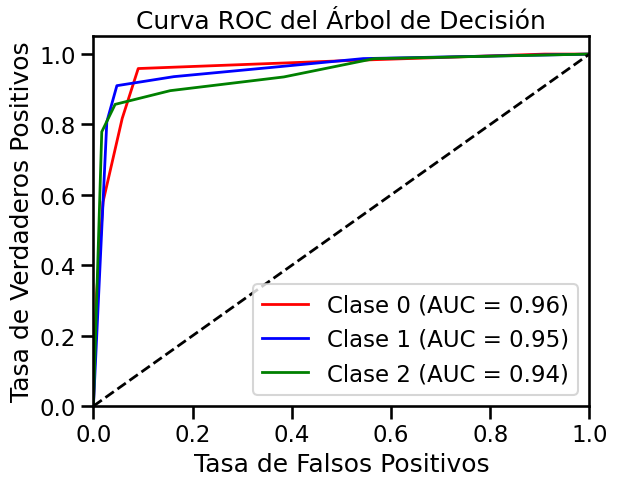

In [112]:
#Creditos parcial OPEN_IA

# Obtener las probabilidades de predicción para cada clase
y_prob = tree.predict_proba(X)

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(tree.classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC para cada clase
plt.figure()
colors = cycle(['red', 'blue', 'green'])
for i, color in zip(range(tree.classes_.shape[0]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Árbol de Decisión')
plt.legend(loc="lower right")
plt.show()

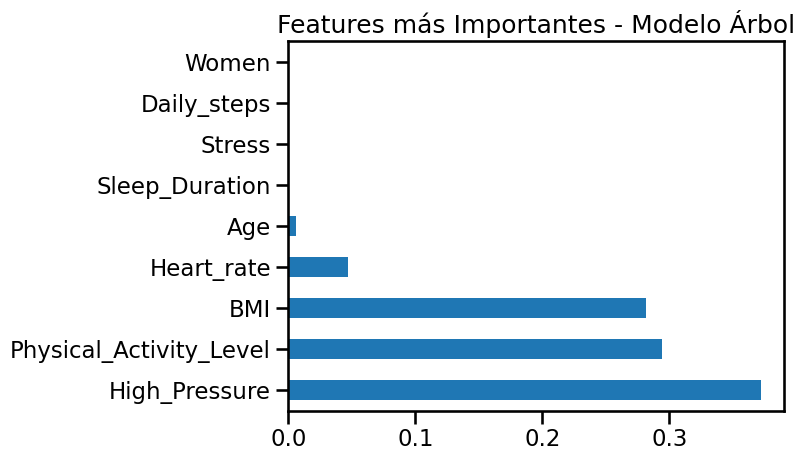

In [113]:
(pd.Series(tree.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))
plt.title("Features más Importantes - Modelo Árbol")
plt.show()


## Regresor Logistico

Despues modelamos con un regresor logistico para comparar los modelos usando el accuracy score como metrica y evaluar que parametros consideran cada modelo como mas importantes para clasificar.
Por este motivo solo usamos como penalty l1

In [116]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [117]:
# Grilla para Grid Search
C_list = [1, 10, 100]
solver_list = ['lbfgs', 'liblinear']
max_iter_list = [500, 1000, 1500]

param_grid = {'LR__C': C_list,
              'LR__solver': solver_list,
              'LR__max_iter': max_iter_list}

In [118]:
np.random.seed(19)
df_results_lg = pd.DataFrame()
N_folds = 40

pipe = Pipeline([('SS', StandardScaler()), ('LR', LogisticRegression(penalty='l1'))])

grid_model_lg = GridSearchCV(pipe, param_grid, cv=N_folds)
grid_model_lg.fit(X_train,y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

GridSearchCV(cv=40,
             estimator=Pipeline(steps=[('SS', StandardScaler()),
                                       ('LR',
                                        LogisticRegression(penalty='l1'))]),
             param_grid={'LR__C': [1, 10, 100],
                         'LR__max_iter': [500, 1000, 1500],
                         'LR__solver': ['lbfgs', 'liblinear']})

In [119]:
print("Mejores parametros: "+str(grid_model_lg.best_params_))
print("Mejor Score: "+ str(grid_model_lg.best_score_)+'\n')

scores_lg = pd.DataFrame(grid_model_lg.cv_results_)

Mejores parametros: {'LR__C': 1, 'LR__max_iter': 500, 'LR__solver': 'liblinear'}
Mejor Score: 0.924107142857143



sacamos class_weight como hiper porque siempre da None que es el default

cv 10 = Mejores parametros: {'C': 10, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2'}

Mejor Score: 0.8697012802275961

cv 10 = Mejores parametros: {'C': 1000, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2'}

Mejor Score: 0.8909672830725462

cv 20 = Mejores parametros: {'C': 10, 'class_weight': None, 'max_iter': 1500, 'penalty': 'l2'}

Mejor Score: 0.897953216374269

cv 10 = Mejores parametros: {'C': 100, 'max_iter': 1500, 'penalty': 'l1', 'solver': 'liblinear'}

Mejor Score: 0.9017069701280228

cv = 10 Mejores parametros: {'C': 100, 'max_iter': 1500, 'penalty': 'l1', 'solver': 'liblinear'}

Mejor Score: 0.9233333333333335

cv = 40 Mejores parametros: {'LR__C': 1, 'LR__max_iter': 500, 'LR__solver': 'liblinear'}

Mejor Score: 0.924107142857143

In [120]:
np.random.seed(19)

modelo_prueba = Pipeline([('SS', StandardScaler()), ('LR', LogisticRegression(C=1, max_iter= 500, penalty= 'l1', solver= 'liblinear'))])
#modelo_prueba = LogisticRegression(C=1, max_iter= 500, penalty= 'l1', solver= 'liblinear')
modelo_prueba.fit(X_train,y_train)


Pipeline(steps=[('SS', StandardScaler()),
                ('LR',
                 LogisticRegression(C=1, max_iter=500, penalty='l1',
                                    solver='liblinear'))])

In [121]:
y_pred_lg = modelo_prueba.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lg)
print(f'El modelo tiene un accuracy de {accuracy}')

El modelo tiene un accuracy de 0.8783783783783784


In [122]:
matriz_confucion_lg =  confusion_matrix(y_test, y_pred_lg)
print(matriz_confucion_lg)

[[40  0  2]
 [ 3 13  1]
 [ 3  0 12]]


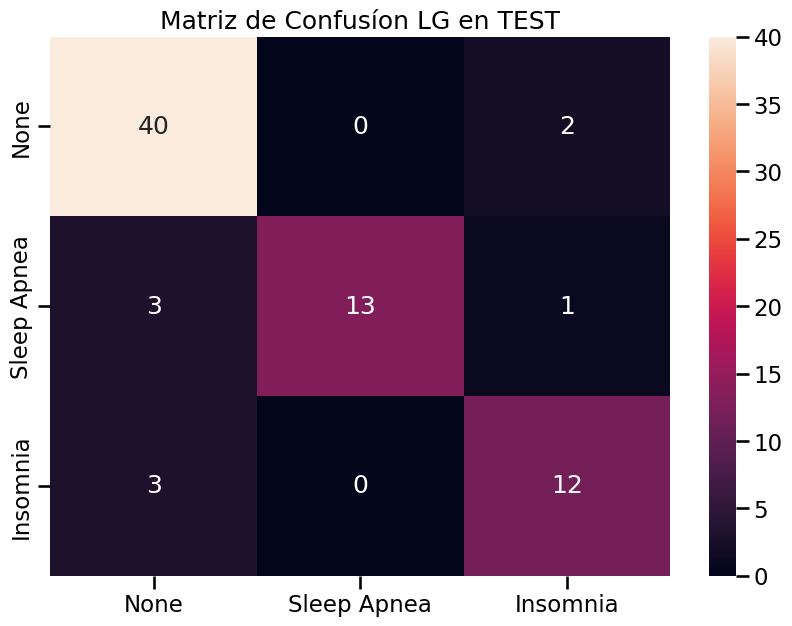

In [123]:
mat_con_lg = pd.DataFrame(matriz_confucion_lg, index=["None", "Sleep Apnea", "Insomnia"],
                       columns=["None", "Sleep Apnea", "Insomnia"])
plt.figure(figsize = (10,7))
sns.heatmap(mat_con_lg, annot=True)
plt.title("Matriz de Confusíon LG en TEST")
plt.show()

In [124]:
reporte_lg = classification_report(y_test, y_pred_lg)
print(reporte_lg)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       1.00      0.76      0.87        17
           2       0.80      0.80      0.80        15

    accuracy                           0.88        74
   macro avg       0.89      0.84      0.86        74
weighted avg       0.89      0.88      0.88        74



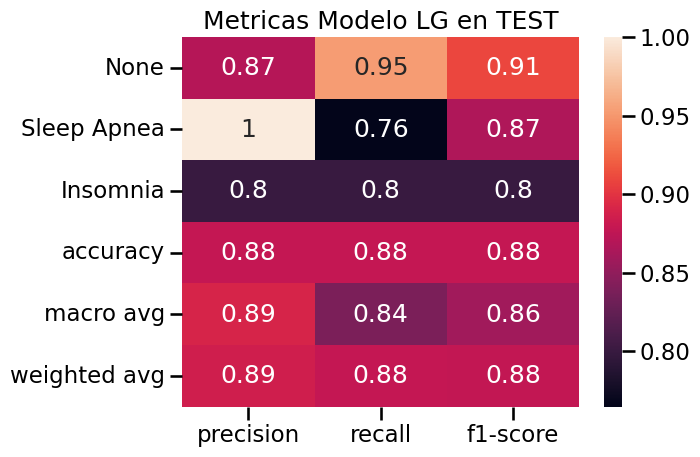

In [125]:
target_names = ['None', 'Sleep Apnea', 'Insomnia']
reporte_lg = classification_report(y_test,
                                   y_pred_lg,
                                   target_names=target_names,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(reporte_lg).iloc[:-1, :].T, annot=True)
plt.title("Metricas Modelo LG en TEST")
plt.show()

In [126]:
coef = modelo_prueba.named_steps['LR'].coef_
coef

array([[ 0.        ,  0.        ,  0.        , -0.75794185,  0.        ,
         0.62975226, -1.46451196, -0.77204375, -1.68901901],
       [-0.5073187 ,  1.50861928,  0.42158933,  0.        ,  1.39307365,
         0.78595905,  0.82566793,  1.99153533,  1.17143034],
       [ 1.06023152, -2.19920019,  0.        ,  0.        , -1.10346821,
        -1.83594977,  0.01474968, -0.58687509,  2.09238401]])

In [127]:
X.columns

Index(['Age', 'Sleep_Duration', 'Physical_Activity_Level', 'Stress',
       'Heart_rate', 'Daily_steps', 'BMI', 'Women', 'High_Pressure'],
      dtype='object')

El regresor logistico coincide con el arbol en cuando a la importancia de BMI como indicador de salud y la duracion del sueñop, pero despues resalta la presion alta, si es o no mujer.

In [128]:
coef_reg_log = pd.DataFrame(coef, columns=X.columns)
coef_reg_log


,Age,Sleep_Duration,Physical_Activity_Level,Stress,Heart_rate,Daily_steps,BMI,Women,High_Pressure
0,0.000000,0.000000,0.000000,-0.757942,0.000000,0.629752,-1.464512,-0.772044,-1.689019
1,-0.507319,1.508619,0.421589,0.000000,1.393074,0.785959,0.825668,1.991535,1.171430
2,1.060232,-2.199200,0.000000,0.000000,-1.103468,-1.835950,0.014750,-0.586875,2.092384


In [129]:
#target_names = ['None', 'Sleep Apnea', 'Insomnia']
model_lg = modelo_prueba.fit(X_train,y_train)
importances_NONE = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelo_prueba.named_steps['LR'].coef_[0]
})
importances = importances_NONE.sort_values(by='Importance', ascending=False)

importances_SleepApnea = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelo_prueba.named_steps['LR'].coef_[1]
})
importances_SleepApnea = importances_SleepApnea.sort_values(by='Importance', ascending=False)

importances_Insomnia = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': modelo_prueba.named_steps['LR'].coef_[2]
})
importances_Insomnia = importances_Insomnia.sort_values(by='Importance', ascending=False)

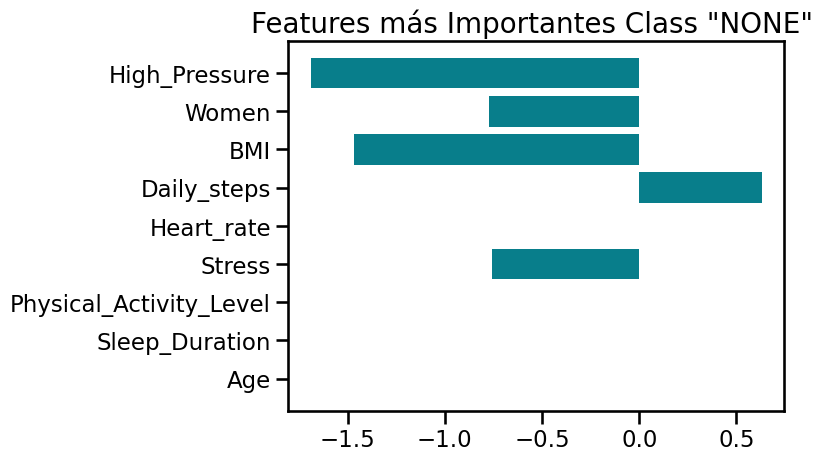

In [130]:
fig, ax = plt.subplots()
ax.barh(y=importances_NONE['Attribute'], width=importances_NONE['Importance'], align='center', color='#087E8B')
plt.title('Features más Importantes Class "NONE" ', size=20)
plt.show()


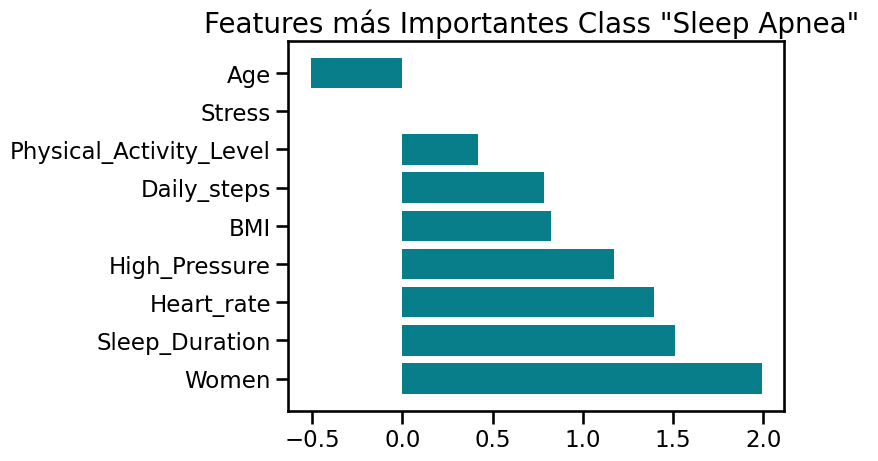

In [131]:
fig, ax = plt.subplots()
ax.barh(y=importances_SleepApnea['Attribute'], width=importances_SleepApnea['Importance'], align='center', color='#087E8B')
plt.title('Features más Importantes Class "Sleep Apnea" ', size=20)
plt.show()

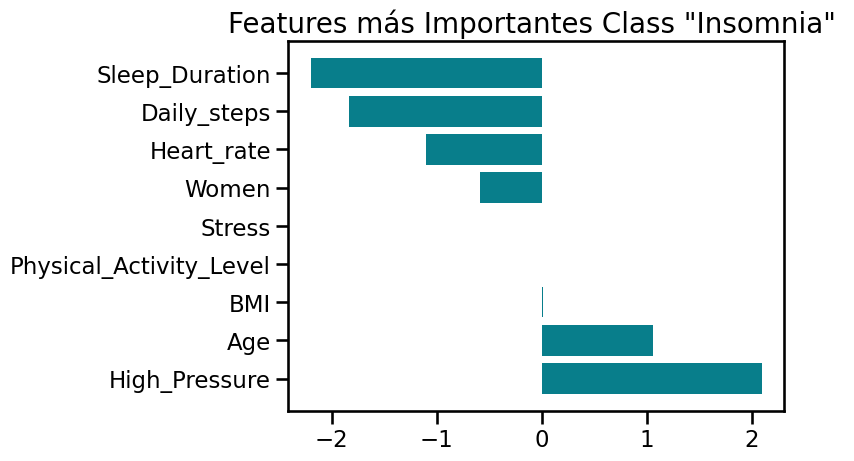

In [132]:
fig, ax = plt.subplots()
ax.barh(y=importances_Insomnia['Attribute'], width=importances_Insomnia['Importance'], align='center', color='#087E8B')
plt.title('Features más Importantes Class "Insomnia" ', size=20)
plt.show()

In [133]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

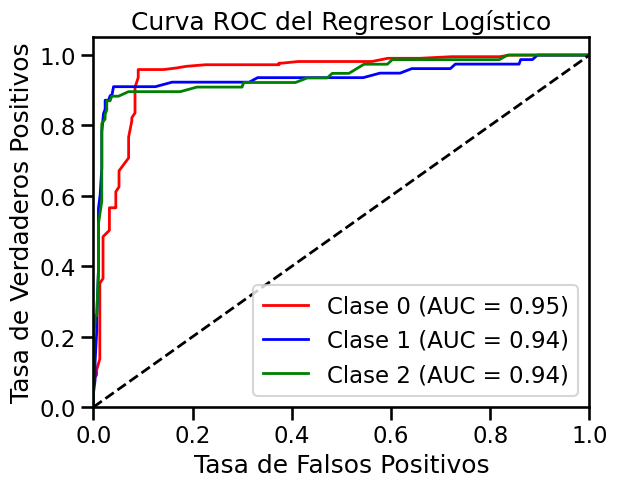

In [134]:
#Creditos parcial OPEN_IA


# Obtener las probabilidades de predicción para cada clase
y_prob = modelo_prueba.predict_proba(X)

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(modelo_prueba.named_steps['LR'].classes_.shape[0]):
    fpr[i], tpr[i], _ = roc_curve(y == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar las curvas ROC para cada clase
plt.figure()
colors = cycle(['red', 'blue', 'green'])
for i, color in zip(range(modelo_prueba.named_steps['LR'].classes_.shape[0]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Clase {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Regresor Logístico')
plt.legend(loc="lower right")
plt.show()
